In [13]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import scipy.stats as sts

In [14]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [15]:
# Read the data files and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
city_data_df["type"].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [16]:
#Understand data from city using .count() .unique() etc
city_data_df.dtypes

# Get the number of data points from the Urban, Rural and Suburban cities.
#sum(city_data_df["type"]=="Rural")

city            object
driver_count     int64
type            object
dtype: object

In [17]:
#Understand data from rides using .count() .unique() etc
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [18]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [19]:
#Create Urban city DF
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]

#Create Suburban city DF
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]

#Create rural city DF
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

In [20]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]#["ride_id"] id pretty much redundant

# Get the number of rides for suburban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

# Get the number of rides for rural cities.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [21]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

# Get average fare for each city in the suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

# Get average fare for each city in the rural cities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [22]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

# Get the average number of drivers for each suburban city.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

# Get the average number of drivers for each suburban city.
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

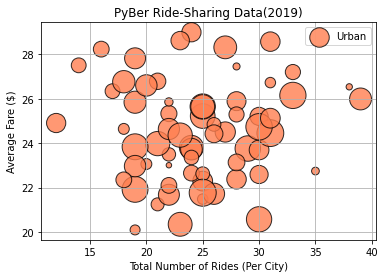

In [23]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            color="coral", alpha = 0.8,
            edgecolor="black", linewidth=1, 
            marker='o',
            s=urban_driver_count*10)

plt.title("PyBer Ride-Sharing Data(2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend(["Urban"])

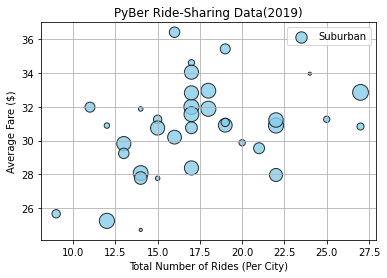

In [24]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            color="skyblue", alpha = 0.8,
            edgecolor="black", linewidth=1, 
            marker='o',
            s=suburban_driver_count*10)

plt.title("PyBer Ride-Sharing Data(2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend(["Suburban"])

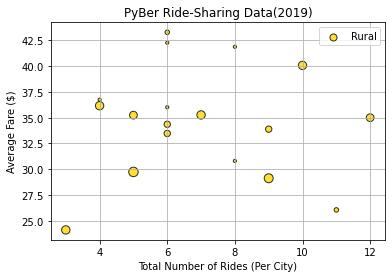

In [25]:
# Build the scatter plots for urban cities.
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            color="gold", alpha = 0.8,
            edgecolor="black", linewidth=1, 
            marker='o',
            s=rural_driver_count*10)

plt.title("PyBer Ride-Sharing Data(2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend(["Rural"])

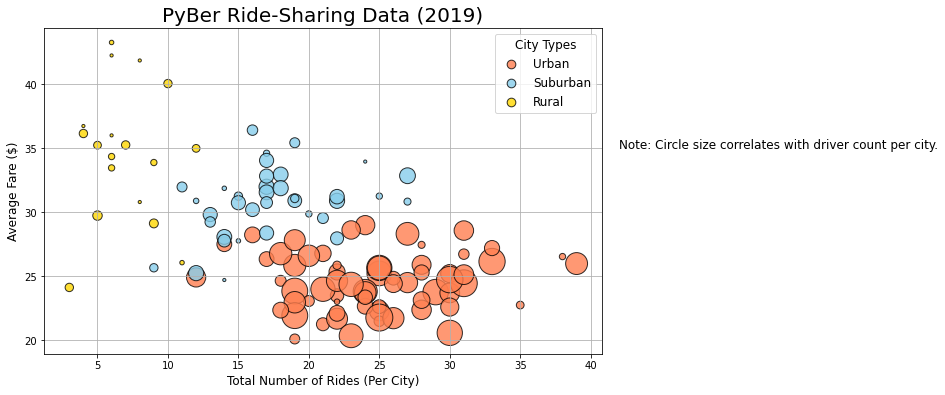

In [26]:
# Build the scatter plots for urban cities.
plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            color="coral", alpha = 0.8,
            edgecolor="black", linewidth=1, 
            marker='o',
            s=urban_driver_count*10,
           label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            color="skyblue", alpha = 0.8,
            edgecolor="black", linewidth=1, 
            marker='o',
            s=suburban_driver_count*10,
           label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            color="gold", alpha = 0.8,
            edgecolor="black", linewidth=1, 
            marker='o',
            s=rural_driver_count*10,
           label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
lgnd=plt.legend(fontsize="12", mode="Expanded",
                scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12", wrap=True)
#plt.savefig("analysis/CityTypeData.png", bbox_inches='tight')

In [16]:
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [17]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [18]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

#Just to show this is the same as what .describe() gives us

(24.62, 17.36, 6.94)

In [19]:
# Calculate the mode of the ride count for the urban cities.
suburban_ride_count.mode()

0    17
dtype: int64

In [20]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [21]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [22]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

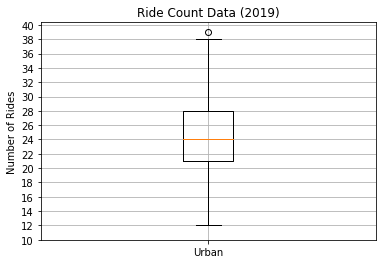

In [23]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

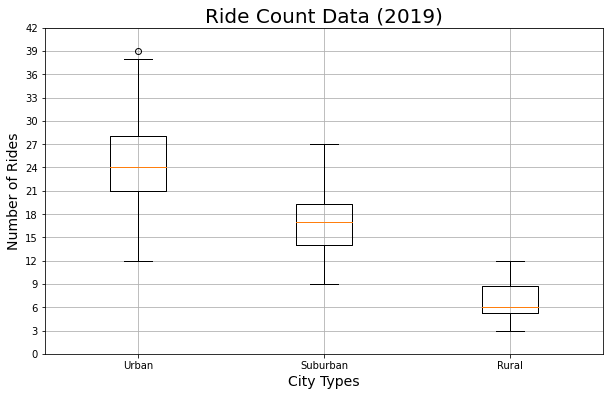

In [24]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/BoxWhisk_NumRides.png")
plt.show()

In [25]:
#Outlier is 39 rides/city for urban cities. Retrieve all cities where urban_ride_count=39 is true
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


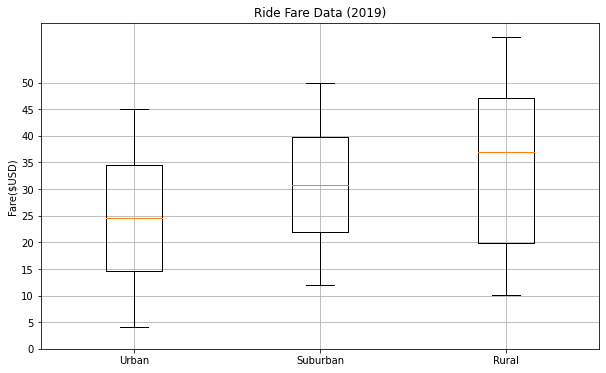

In [26]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban", "Suburban","Rural"]
fig, ax = plt.subplots(figsize=(10, 6))
ride_fares_data = [urban_fares, suburban_fares, rural_fares]
ax.boxplot(ride_fares_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.savefig("analysis/BoxWhisk_fares.png")
plt.show()

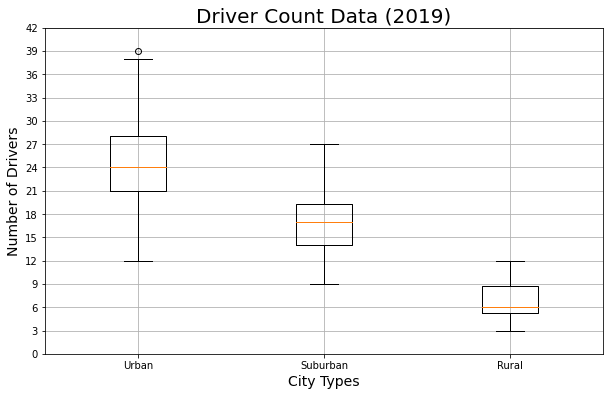

In [27]:
# Add all driver count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/BoxWhisk_NumDrivers.png")
plt.show()


In [28]:
sum_fares_by_type=pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares=pyber_data_df["fare"].sum()

# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

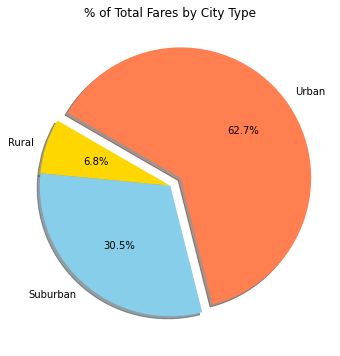

In [29]:
types=["Rural", "Suburban", "Urban"]
colors=["gold", "skyblue", "coral"]
explode=[0,0,0.1]
plt.subplots(figsize=(10, 6))
plt.pie(sum_fares_by_type,
        labels=types, 
        autopct='%1.1f%%',
        explode=explode,
        colors=colors,
        shadow=True,
        startangle=150)
plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/percent_fares.png")

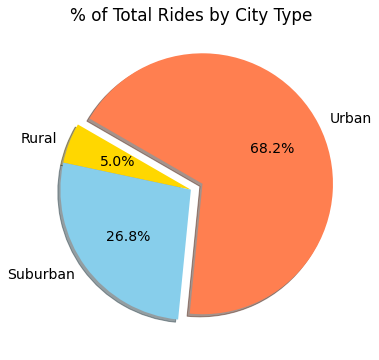

In [30]:
sum_rides_by_type=pyber_data_df.groupby(["type"]).sum()["ride_id"]

plt.subplots(figsize=(10, 6))
plt.pie(sum_rides_by_type,
        labels=types, 
        autopct='%1.1f%%',
        explode=explode,
        colors=colors,
        shadow=True,
        startangle=150)
plt.title("% of Total Rides by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/percent_rides.png")

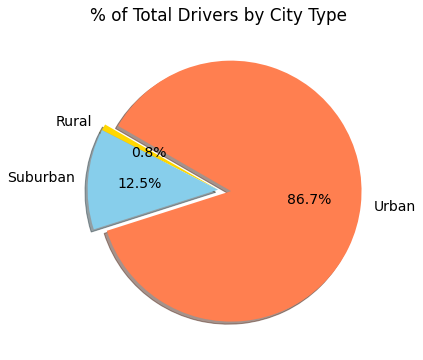

In [31]:
sum_drivers_by_type=pyber_data_df.groupby(["type"]).sum()["driver_count"]

plt.subplots(figsize=(10, 6))
plt.pie(sum_drivers_by_type,
        labels=types, 
        autopct='%1.1f%%',
        explode=explode,
        colors=colors,
        shadow=True,
        startangle=150)
plt.title("% of Total Drivers by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/percent_drivers.png")

In [32]:
sum_drivers_by_type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64